In [1]:
def test(x):
    return x + 1

test(1)

2

In [3]:
sqlContext.registerFunction("test", test)


In [4]:
def test_ii(x):
    return x * 10

test_ii(10)

100

In [5]:
sqlContext.registerFunction("test_ii", test_ii)


In [6]:
game_df = sqlContext.read.format('jdbc').options(url='jdbc:db2://bluemix05.bluforcloud.com:50000/BLUDB', dbtable='DASH019163.GAME', user='dash019163', password='p9lF04HeD7ZQ').load()

In [7]:
game_df.registerTempTable("game")

In [8]:
query = """
CREATE TEMPORARY TABLE player
USING org.apache.spark.sql.jdbc
OPTIONS (
   url 'jdbc:db2://bluemix05.bluforcloud.com:50000/BLUDB', 
  dbtable 'DASH019163.PLAYER', 
  user 'dash019163', 
  password 'p9lF04HeD7ZQ'
)
"""
player = sqlContext.sql(query)

In [9]:
query = """
select
 COLLEGE,
 count(*) as COUNT
from
 player
where
 COLLEGE is not null
group by
 COLLEGE
order by count(*) desc
limit 20
"""
player_pd = sqlContext.sql(query).toPandas()

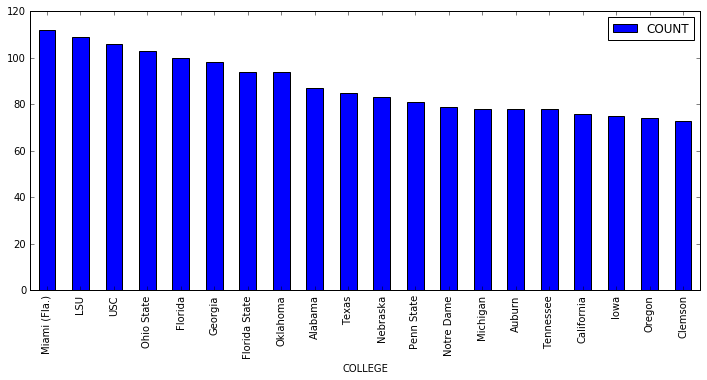

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt, numpy as np

player_pd.plot(kind='bar', x='COLLEGE', figsize=(12, 5))

In [11]:
query = """

SELECT GSIS_ID
       , GAMEKEY
       , START_TIME
       , WEEK
       , DAY_OF_WEEK
       , SEASON_YEAR
       , SEASON_TYPE
       , FINISHED
	   , HOME_TEAM as LOCATION
	   , 1 as HOME_GAME
       , HOME_TEAM as TEAM
       , HOME_SCORE as SCORE
       , HOME_SCORE_Q1 as SCORE_Q1
       , HOME_SCORE_Q2 as SCORE_Q2
       , HOME_SCORE_Q3 as SCORE_Q3
       , HOME_SCORE_Q4 as SCORE_Q4
       , HOME_SCORE_Q5 as SCORE_Q5
       , HOME_TURNOVERS as TURNOVERS
	   , AWAY_TEAM as OPPONENT_TEAM
       , AWAY_SCORE as OPPONENT_SCORE
       , AWAY_SCORE_Q1 as OPPONENT_SCORE_Q1
       , AWAY_SCORE_Q2 as OPPONENT_SCORE_Q2
       , AWAY_SCORE_Q3 as OPPONENT_SCORE_Q3
       , AWAY_SCORE_Q4 as OPPONENT_SCORE_Q4
       , AWAY_SCORE_Q5 as OPPONENT_SCORE_Q5
       , AWAY_TURNOVERS as OPPONENT_TURNOVERS
	   ,CASE 
	   		WHEN HOME_SCORE > AWAY_SCORE then 1
			WHEN HOME_SCORE < AWAY_SCORE then 0
		END as  WON
		,CASE 
	   		WHEN HOME_SCORE = AWAY_SCORE then 1
			WHEN HOME_SCORE != AWAY_SCORE then 0
		END as  TIE
  FROM game
  UNION ALL
  SELECT GSIS_ID
       , GAMEKEY
       , START_TIME
       , WEEK
       , DAY_OF_WEEK
       , SEASON_YEAR
       , SEASON_TYPE
       , FINISHED
       , HOME_TEAM as LOCATION
	   , 0 as HOME_GAME
       , AWAY_TEAM as TEAM
       , AWAY_SCORE as SCORE
       , AWAY_SCORE_Q1 as SCORE_Q1
       , AWAY_SCORE_Q2 as SCORE_Q2
       , AWAY_SCORE_Q3 as SCORE_Q3
       , AWAY_SCORE_Q4 as SCORE_Q4
       , AWAY_SCORE_Q5 as SCORE_Q5
       , AWAY_TURNOVERS as TURNOVERS
	   , HOME_TEAM as OPPONENT_TEAM
       , HOME_SCORE as OPPONENT_SCORE
       , HOME_SCORE_Q1 as OPPONENT_SCORE_Q1
       , HOME_SCORE_Q2 as OPPONENT_SCORE_Q2
       , HOME_SCORE_Q3 as OPPONENT_SCORE_Q3
       , HOME_SCORE_Q4 as OPPONENT_SCORE_Q4
       , HOME_SCORE_Q5 as OPPONENT_SCORE_Q5
       , HOME_TURNOVERS as OPPONENT_TURNOVERS
	   ,CASE 
	   		WHEN AWAY_SCORE > HOME_SCORE then 1
			WHEN AWAY_SCORE < HOME_SCORE then 0
		END as  WON
		,CASE 
	   		WHEN HOME_SCORE = AWAY_SCORE then 1
			WHEN HOME_SCORE != AWAY_SCORE then 0
		END as  TIE
  FROM game
"""

In [12]:
games_norm_df = sqlContext.sql(query)
games_norm_df.registerTempTable("game_normalized")

In [13]:
games_norm_df.printSchema()

root
 |-- GSIS_ID: integer (nullable = false)
 |-- GAMEKEY: integer (nullable = false)
 |-- START_TIME: timestamp (nullable = false)
 |-- WEEK: integer (nullable = false)
 |-- DAY_OF_WEEK: string (nullable = false)
 |-- SEASON_YEAR: integer (nullable = false)
 |-- SEASON_TYPE: string (nullable = false)
 |-- FINISHED: string (nullable = false)
 |-- LOCATION: string (nullable = false)
 |-- HOME_GAME: integer (nullable = false)
 |-- TEAM: string (nullable = false)
 |-- SCORE: integer (nullable = false)
 |-- SCORE_Q1: integer (nullable = false)
 |-- SCORE_Q2: integer (nullable = false)
 |-- SCORE_Q3: integer (nullable = false)
 |-- SCORE_Q4: integer (nullable = false)
 |-- SCORE_Q5: integer (nullable = false)
 |-- TURNOVERS: integer (nullable = false)
 |-- OPPONENT_TEAM: string (nullable = false)
 |-- OPPONENT_SCORE: integer (nullable = false)
 |-- OPPONENT_SCORE_Q1: integer (nullable = false)
 |-- OPPONENT_SCORE_Q2: integer (nullable = false)
 |-- OPPONENT_SCORE_Q3: integer (nullable = fa

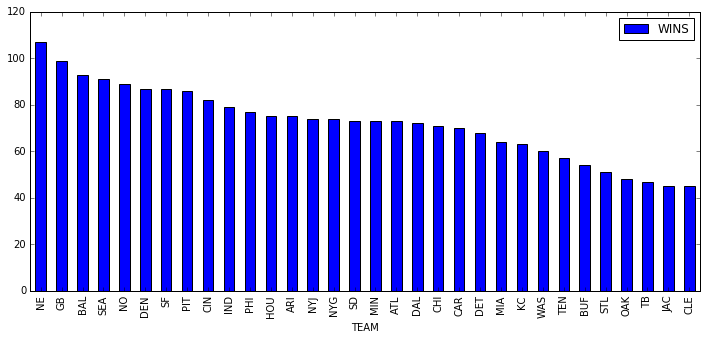

In [14]:
query = """
select
    sum(WON) as WINS,
    TEAM
FROM
    game_normalized
GROUP BY
    TEAM
ORDER BY WINS desc
"""
pd = sqlContext.sql(query).toPandas()
pd.plot(kind='bar', x='TEAM', figsize=(12, 5))

In [15]:
team_df = sqlContext.read.format('jdbc').options(url='jdbc:db2://bluemix05.bluforcloud.com:50000/BLUDB', dbtable='DASH019163.TEAM', user='dash019163', password='p9lF04HeD7ZQ').load()
team_df.registerTempTable("team")

In [16]:
!rm stadiums.json
!wget https://raw.githubusercontent.com/bradenrc/nfl_weather/master/stadiums.json#

rm: cannot remove 'stadiums.json': No such file or directory
--2016-05-04 19:25:40--  https://raw.githubusercontent.com/bradenrc/nfl_weather/master/stadiums.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 23.235.44.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|23.235.44.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3191 (3.1K) [text/plain]
Saving to: 'stadiums.json'

100%[======================================>] 3,191       --.-K/s   in 0s      

2016-05-04 19:25:40 (471 MB/s) - 'stadiums.json' saved [3191/3191]



In [17]:
stadiums_df = sqlContext.read.json("./stadiums.json")
stadiums_df.registerTempTable("stadiums")

In [25]:
def match_strings_fuzzy(str1, str2):
    return str1.lower() in str2.lower()

sqlContext.registerFunction("match_strings_fuzzy", match_strings_fuzzy)


In [19]:
locations_d = []

for l in stadiums_df.collect():
    locations_d.append([l.team ,l.stadium_city])

def match_city_team(team):
    for x in locations_d:
        if team in x[0]:
            return x[1]
        
print match_city_team("Bills")
print match_city_team("Giants")

Orchard Park, NY
East Rutherford, NJ


In [20]:
team_df.map(lambda x: match_city_team(x.NAME)).take(2)

[u'Glendale, AZ', u'Atlanta, GA']

In [21]:
from pyspark.sql import Row

team_loc_df = team_df.map(lambda x: Row(**dict(x.asDict(), location=match_city_team(x.NAME)))).toDF()
team_loc_df.registerTempTable("team_loc")

In [22]:
sqlContext.sql("select * from team_loc").toPandas()

,CITY,NAME,TEAM_ID,location
0,Arizona,Cardinals,ARI,"Glendale, AZ"
1,Atlanta,Falcons,ATL,"Atlanta, GA"
2,Baltimore,Ravens,BAL,"Baltimore, MD"
3,Buffalo,Bills,BUF,"Orchard Park, NY"
4,Carolina,Panthers,CAR,"Charlotte, NC"
5,Chicago,Bears,CHI,"Chicago, IL"
6,Cincinnati,Bengals,CIN,"Cincinnati, OH"
7,Cleveland,Browns,CLE,"Cleveland, OH"
8,Dallas,Cowboys,DAL,"Arlington, TX"
9,Denver,Broncos,DEN,"Denver, CO"


In [26]:
query = """
select
    lower(CITY + NAME),
    TEAM_ID,
    CITY,
    NAME,
    stadium_city,
    stadium_name,
    team,
    match_strings_fuzzy(NAME, team)
from
    team, stadiums
where
    match_strings_fuzzy(NAME, team) = 'true'
"""

team_locations = sqlContext.sql(query)
team_locations.registerTempTable("team_locations")
team_locations.toPandas()

,_c0,TEAM_ID,CITY,NAME,stadium_city,stadium_name,team,_c7
0,None,ARI,Arizona,Cardinals,"Glendale, AZ",University of Phoenix Stadium,Arizona Cardinals,true
1,None,ATL,Atlanta,Falcons,"Atlanta, GA",Georgia Dome,Atlanta Falcons,true
2,None,BAL,Baltimore,Ravens,"Baltimore, MD",M&T Bank Stadium,Baltimore Ravens,true
3,None,BUF,Buffalo,Bills,"Orchard Park, NY",Ralph Wilson Stadium,Buffalo Bills,true
4,None,CAR,Carolina,Panthers,"Charlotte, NC",Bank of America Stadium,Carolina Panthers,true
5,None,CHI,Chicago,Bears,"Chicago, IL",Soldier Field,Chicago Bears,true
6,None,CIN,Cincinnati,Bengals,"Cincinnati, OH",Paul Brown Stadium,Cincinnati Bengals,true
7,None,CLE,Cleveland,Browns,"Cleveland, OH",FirstEnergy Stadium,Cleveland Browns,true
8,None,DAL,Dallas,Cowboys,"Arlington, TX",AT&T Stadium,Dallas Cowboys,true
9,None,DEN,Denver,Broncos,"Denver, CO",Sports Authority Field at Mile High,Denver Broncos,true


In [37]:
query = """
select
    DISTINCT
    GSIS_ID,
    START_TIME,
    team_loc.location as stadium_city,
    game_normalized.LOCATION
from
    game_normalized 
inner join team_loc on
     game_normalized.LOCATION = team_loc.TEAM_ID
limit 10
"""
sqlContext.sql(query).toPandas()

,GSIS_ID,START_TIME,stadium_city,LOCATION
0,2013120807,2013-12-08 10:00:00,"Tampa, FL",TB
1,2014082808,2014-08-28 16:30:00,"Tampa, FL",TB
2,2014090711,2014-09-07 13:25:00,"Tampa, FL",TB
3,2014091409,2014-09-14 13:05:00,"Tampa, FL",TB
4,2014101207,2014-10-12 10:00:00,"Tampa, FL",TB
5,2014102607,2014-10-26 10:00:00,"Tampa, FL",TB
6,2014110906,2014-11-09 10:00:00,"Tampa, FL",TB
7,2014122107,2014-12-21 10:00:00,"Tampa, FL",TB
8,2015111502,2015-11-15 10:00:00,"Tampa, FL",TB
9,2015091311,2015-09-13 13:25:00,"Tampa, FL",TB


In [38]:
query = """
select
    DISTINCT
    GSIS_ID,
    START_TIME,
    team_loc.location as stadium_city,
    game_normalized.LOCATION
from
    game_normalized 
inner join team_loc on
     game_normalized.LOCATION = team_loc.TEAM_ID
"""
distinct_games_df = sqlContext.sql(query)
distinct_games_df.registerTempTable("distinct_games")
print distinct_games_df.count()

2316


In [39]:
import datetime
import os

api_key = "9ea2f24ba4e99c50"

#add a leading zero to the dates for the API
def lead_zero(value):
    if int(value) in range(1,10):
        return str(0) + str(value)
    else:
        return value

#function to build the URI that calls the weather underground API    
def weather_uri(location, game_day):

    base_uri = "http://api.wunderground.com/api/{}/history_".format(api_key)
    
    #x = datetime.datetime.strptime(game_day, "%B %d %Y").date()
    x = game_day
    date_formated = "".join([str(x.year), lead_zero(str(x.month)), lead_zero(str(x.day))])

    location_l = location.split(",")
    state = location_l[1].replace(" ", "")
    city = location_l[0].replace(" ", "_")

    ruri = base_uri + date_formated + "/q/" + state + "/" + city + ".json"
    return ruri

#register the function for SQL to use
sqlContext.registerFunction("weather_uri", weather_uri)

In [40]:
distinct_games_df.map(lambda x: weather_uri(x.stadium_city, x.START_TIME)).take(2)

[u'http://api.wunderground.com/api/9ea2f24ba4e99c50/history_20141221/q/FL/Tampa.json',
 u'http://api.wunderground.com/api/9ea2f24ba4e99c50/history_20151115/q/FL/Tampa.json']

In [41]:
query = """
select *, weather_uri(stadium_city, START_TIME) as URI
from
distinct_games
limit 2
"""

sqlContext.sql(query).toPandas()

,GSIS_ID,START_TIME,stadium_city,LOCATION,URI
0,2013120807,2013-12-08 10:00:00,"Tampa, FL",TB,http://api.wunderground.com/api/9ea2f24ba4e99c...
1,2014082808,2014-08-28 16:30:00,"Tampa, FL",TB,http://api.wunderground.com/api/9ea2f24ba4e99c...


In [42]:
query = """
select *, weather_uri(stadium_city, START_TIME) as URI
from
distinct_games
"""
weather_uri_games = sqlContext.sql(query)
weather_uri_games.registerTempTable("weather_uri_games")

In [ ]:
import json
import requests

def get_weather_data(uri):
    rdict ={}

    try:
        r = requests.get(uri)
        wjs = json.loads(r.text)

        if 'history' in wjs:
            if 'dailysummary' in wjs['history']:
                rdict = wjs['history']['dailysummary'][0]
    except:
        redict = {}
        
    return rdict

sqlContext.registerFunction("get_weather_data", get_weather_data)

In [44]:
query = """
select *, get_weather_data(URI) as weather
from
weather_uri_games
"""
distinct_games_weather_df = sqlContext.sql(query)
distinct_games_weather_df.registerTempTable("distinct_games_weather")

In [46]:
distinct_games_weather_df.count()

2316

In [47]:
for y in distinct_games_weather_df.take(5):
    print y

Row(GSIS_ID=2014122107, START_TIME=datetime.datetime(2014, 12, 21, 10, 0), stadium_city=u'Tampa, FL', LOCATION=u'TB', URI=u'http://api.wunderground.com/api/9ea2f24ba4e99c50/history_20141221/q/FL/Tampa.json', weather=u'{date={pretty=12:00 PM EST on December 21, 2014, min=00, hour=12, year=2014, mday=21, tzname=America/New_York, mon=12}, snowfallm=0.00, precipi=0.06, precipsource=, since1julheatingdegreedays=, snowfalli=0.00, precipm=1.52, meantempm=21, monthtodateheatingdegreedays=, since1julsnowfallm=, thunder=0, meantempi=70, meanvisi=10, since1julsnowfalli=, since1jancoolingdegreedaysnormal=, maxwspdi=9, mintempm=17, meanvism=16, minhumidity=61, mintempi=62, humidity=, monthtodatecoolingdegreedaysnormal=, maxwspdm=14, monthtodateheatingdegreedaysnormal=, rain=1, gdegreedays=20, since1sepcoolingdegreedaysnormal=, monthtodatecoolingdegreedays=, since1sepheatingdegreedaysnormal=, heatingdegreedaysnormal=, monthtodatesnowfalli=, mindewptm=15, monthtodatesnowfallm=, mindewpti=59, snow=0, 

In [48]:
def set_hadoop_config(credentials):
    prefix = "fs.swift.service." + credentials['name'] 
    hconf = sc._jsc.hadoopConfiguration()
    hconf.set(prefix + ".auth.url", credentials['auth_url']+'/v3/auth/tokens')
    hconf.set(prefix + ".auth.endpoint.prefix", "endpoints")
    hconf.set(prefix + ".tenant", credentials['project_id'])
    hconf.set(prefix + ".username", credentials['user_id'])
    hconf.set(prefix + ".password", credentials['password'])
    hconf.setInt(prefix + ".http.port", 8080)
    hconf.set(prefix + ".region", credentials['region'])
    hconf.setBoolean(prefix + ".public", True)

In [49]:
credentials = {
    'auth_url': 'https://identity.open.softlayer.com',
    'project_id': 'ba9ee15455674ef2b53faeac782745d9',
    'region': 'dallas',
    'user_id': 'd47592b3c2fc448ca8e6020efe89dc05',
    'username': 'Admin_8900ea74f97a5804cbb51c1a81d74fc4d88bdfa4',
    'password': 'LP7G9,RD1qOb^zly',
    'container': 'notebooks',
    
}

In [50]:
credentials['name'] = 'keystone'
set_hadoop_config(credentials)

In [51]:
path = "swift://notebooks." + credentials['name'] + "/"

games_norm_df = sqlContext.read.json(path + "gamesnormalize.json")
games_norm_df.registerTempTable("games")

distinct_games_weather_df = sqlContext.read.json(path + "weather.json")
distinct_games_weather_df.registerTempTable("weather")

drive_df = sqlContext.read.json(path + "drive.json")
drive_df.registerTempTable("drive")

play_player_df = sqlContext.read.json(path + "play_player.json")
play_player_df.registerTempTable("play_player")

play_df = sqlContext.read.json(path + "play.json")
play_df.registerTempTable("play")

player_df = sqlContext.read.json(path + "player.json")
player_df.registerTempTable("player")

team_df = sqlContext.read.json(path + "team.json")
team_df.registerTempTable("team")

In [52]:
print "Games: ", games_norm_df.count()
print "Weather (distinct games): ", distinct_games_weather_df.count()
print "Drives: ", drive_df.count()
print "Player Plays: ", play_player_df.count()
print "Plays: ", play_df.count()
print "Players: ", player_df.count()
print "Teams:: ", team_df.count()

Games:  4632
Weather (distinct games):  2316
Drives:  54465
Player Plays:  899827
Plays:  406639
Players:  6744
Teams::  33


In [53]:
print "Games: ", games_norm_df.printSchema()
print "Weather (distinct games): ", distinct_games_weather_df.printSchema()
print "Drives: ", drive_df.printSchema()
print "Player Plays: ", play_player_df.printSchema()
print "Plays: ", play_df.printSchema()
print "Players: ", player_df.printSchema()
print "Teams:: ", team_df.printSchema()

Games:  root
 |-- DAY_OF_WEEK: string (nullable = true)
 |-- FINISHED: string (nullable = true)
 |-- GAMEKEY: long (nullable = true)
 |-- GSIS_ID: long (nullable = true)
 |-- HOME_GAME: long (nullable = true)
 |-- LOCATION: string (nullable = true)
 |-- OPPONENT_SCORE: long (nullable = true)
 |-- OPPONENT_SCORE_Q1: long (nullable = true)
 |-- OPPONENT_SCORE_Q2: long (nullable = true)
 |-- OPPONENT_SCORE_Q3: long (nullable = true)
 |-- OPPONENT_SCORE_Q4: long (nullable = true)
 |-- OPPONENT_SCORE_Q5: long (nullable = true)
 |-- OPPONENT_TEAM: string (nullable = true)
 |-- OPPONENT_TURNOVERS: long (nullable = true)
 |-- SCORE: long (nullable = true)
 |-- SCORE_Q1: long (nullable = true)
 |-- SCORE_Q2: long (nullable = true)
 |-- SCORE_Q3: long (nullable = true)
 |-- SCORE_Q4: long (nullable = true)
 |-- SCORE_Q5: long (nullable = true)
 |-- SEASON_TYPE: string (nullable = true)
 |-- SEASON_YEAR: long (nullable = true)
 |-- START_TIME: string (nullable = true)
 |-- TEAM: string (nullable 

In [54]:
%matplotlib inline 
import matplotlib.pyplot as plt, numpy as np

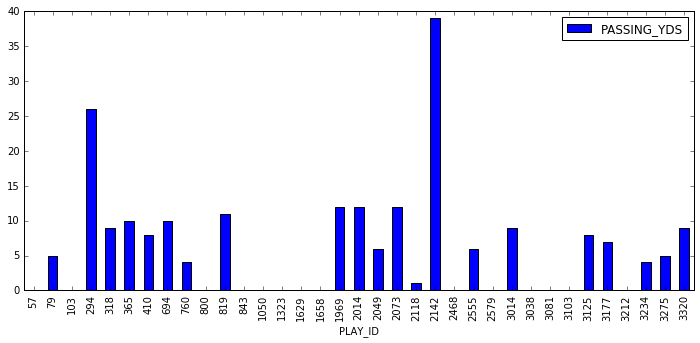

In [55]:
query = """select
    pp.PLAY_ID,
    PASSING_YDS
from games g

INNER JOIN drive d on
    g.GSIS_ID = d.GSIS_ID

INNER JOIN play_player pp on
    g.GSIS_ID = pp.GSIS_ID
    and pp.DRIVE_ID = d.DRIVE_ID

INNER JOIN player p on
    p.PLAYER_ID = pp.PLAYER_ID
    and g.TEAM = p.TEAM

where g.GSIS_ID = 2012090500
        and p.FULL_NAME = 'Eli Manning'
order by 
    g.GSIS_ID,
    d.DRIVE_ID,
    p.PLAYER_ID,
    pp.PLAY_ID"""

plays_manning_pd = sqlContext.sql(query)
plays_manning_pd.toPandas().plot(kind='bar', x='PLAY_ID', y='PASSING_YDS', figsize=(12, 5))

In [56]:
plays_manning_pd.registerTempTable("manning")

query = """
select
    a.PLAY_ID,
    a.PASSING_YDS,
    sum(b.PASSING_YDS) as Total_Yards
from
 manning a
inner join manning b
    on a.PLAY_ID >= b.PLAY_ID
GROUP BY
    a.PLAY_ID, a.PASSING_YDS
order by
    a.PLAY_ID
"""
pd = sqlContext.sql(query).toPandas()

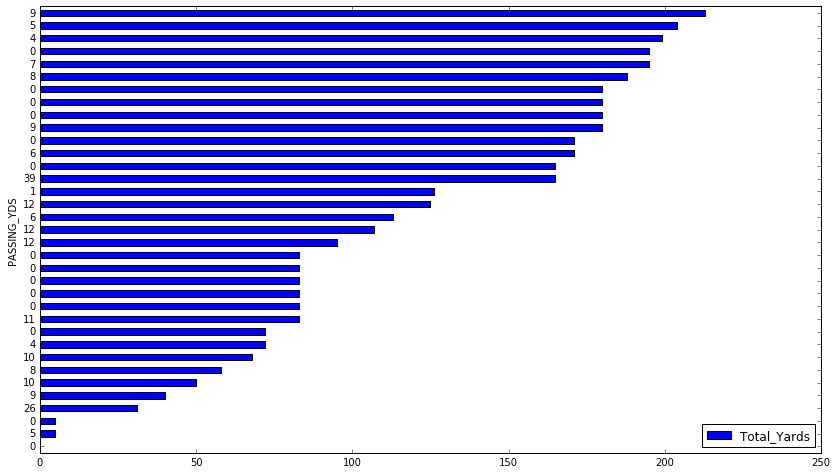

In [57]:
pd.plot(kind='barh', stacked=True, y='Total_Yards', x="PASSING_YDS", figsize=(14, 8))

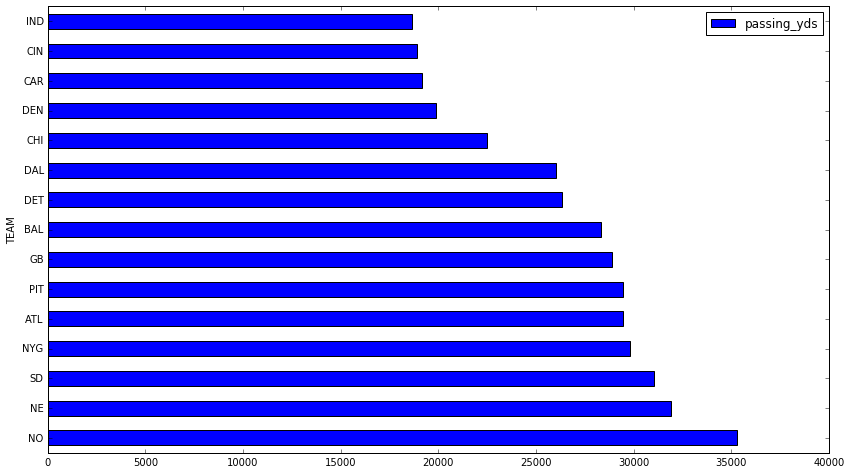

In [58]:
query = """
SELECT 
	player.TEAM, 
	SUM(play_player.PASSING_YDS) AS passing_yds
FROM play_player
INNER JOIN player ON 
    player.PLAYER_ID = play_player.PLAYER_ID
INNER JOIN games ON 
    games.GSIS_ID = play_player.GSIS_ID
    and games.TEAM = player.TEAM
WHERE 
	games.season_type = 'Regular'
	AND PASSING_YDS > 0
GROUP BY player.TEAM
ORDER BY SUM(play_player.PASSING_YDS) desc
limit 15
"""
pd = sqlContext.sql(query).toPandas()
pd.plot(kind='barh', stacked=True, y='passing_yds', x="TEAM", figsize=(14, 8))

In [59]:
query = """

select 
    *
from
    games g
inner join weather w on
    g.GSIS_ID = w.GSIS_ID
limit 5
"""

sqlContext.sql(query).toPandas()

,DAY_OF_WEEK,FINISHED,GAMEKEY,GSIS_ID,HOME_GAME,LOCATION,OPPONENT_SCORE,OPPONENT_SCORE_Q1,OPPONENT_SCORE_Q2,OPPONENT_SCORE_Q3,...,TIE,TURNOVERS,WEEK,WON,GSIS_ID,LOCATION,START_TIME,URI,stadium_city,weather
0,Sunday,t,56595,2015102500,0,JAC,34,0,27,0,...,0,0,7,0,2015102500,JAC,2015-10-25 06:30:00.0,http://api.wunderground.com/api/9ea2f24ba4e99c...,"Jacksonville, FL","(12, , {pretty=12:00 PM EDT on October 25, 201..."
1,Sunday,t,56404,2014122107,0,TB,3,0,3,0,...,0,2,16,1,2014122107,TB,2014-12-21 10:00:00.0,http://api.wunderground.com/api/9ea2f24ba4e99c...,"Tampa, FL","(5, , {pretty=12:00 PM EST on December 21, 201..."
2,Sunday,t,56405,2014122108,0,STL,27,3,10,7,...,0,1,16,1,2014122108,STL,2014-12-21 13:05:00.0,http://api.wunderground.com/api/9ea2f24ba4e99c...,"St. Louis, MO","(0, 0, {pretty=12:00 PM CST on December 21, 20..."
3,Sunday,t,56406,2014122109,0,DAL,42,14,14,7,...,0,2,16,0,2014122109,DAL,2014-12-21 13:25:00.0,http://api.wunderground.com/api/9ea2f24ba4e99c...,"Arlington, TX","(0, , {pretty=12:00 PM CST on December 21, 201..."
4,Sunday,t,56407,2014122110,0,OAK,26,0,13,6,...,0,0,16,0,2014122110,OAK,2014-12-21 13:25:00.0,http://api.wunderground.com/api/9ea2f24ba4e99c...,"Oakland, CA","(0, 0, {pretty=12:00 PM PST on December 21, 20..."


In [60]:
query = """

select 
    g.SEASON_YEAR,
    g.WEEK,
    g.TEAM,
    g.LOCATION,
    w.weather.meanpressurei,
    w.weather.rain,
    w.weather.precipi
from
    games g
inner join weather w on
    g.GSIS_ID = w.GSIS_ID
where 
    w.weather.rain = 1
limit 5
"""

for game in sqlContext.sql(query).collect():
    print game
    print "*" * 20

Row(SEASON_YEAR=2014, WEEK=16, TEAM=u'GB', LOCATION=u'TB', meanpressurei=u'30.05', rain=u'1', precipi=u'0.06')
********************
Row(SEASON_YEAR=2014, WEEK=16, TEAM=u'BUF', LOCATION=u'OAK', meanpressurei=u'30.28', rain=u'1', precipi=u'0.09')
********************
Row(SEASON_YEAR=2014, WEEK=1, TEAM=u'ARI', LOCATION=u'CAR', meanpressurei=u'30.28', rain=u'1', precipi=u'0.25')
********************
Row(SEASON_YEAR=2015, WEEK=1, TEAM=u'TEN', LOCATION=u'TB', meanpressurei=u'29.94', rain=u'1', precipi=u'1.02')
********************
Row(SEASON_YEAR=2015, WEEK=8, TEAM=u'TB', LOCATION=u'ATL', meanpressurei=u'30.01', rain=u'1', precipi=u'0.84')
********************


In [61]:
query = """

select 
    g.TEAM,
    avg(w.weather.meantempi) as avgtempi,
    avg(w.weather.meanwindspdi) as avgwindspdi
from
    games g
inner join weather w on
    g.GSIS_ID = w.GSIS_ID
group by g.TEAM

"""


pd = sqlContext.sql(query).toPandas()


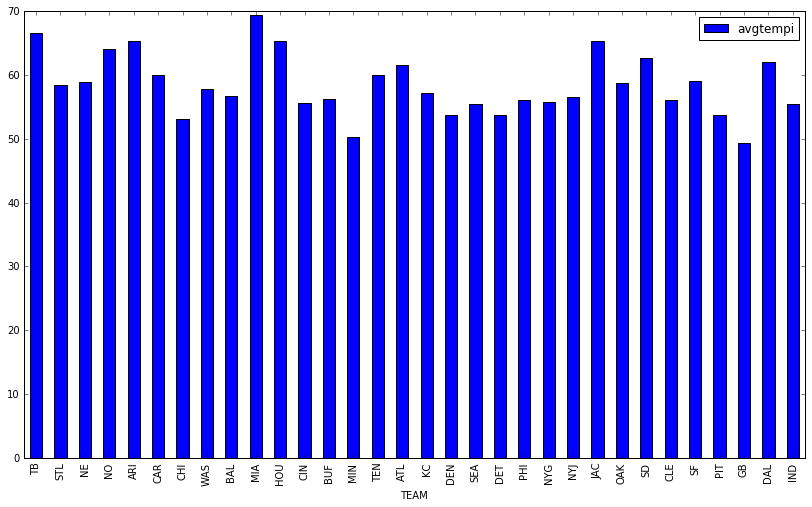

In [62]:
pd.plot(kind="bar", x="TEAM", y="avgtempi", secondary_y=["avgwindspdi"], figsize=(14, 8));